In [1]:
!pip install deap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Algorytm i funkcje do wizualizacji

In [2]:
import random
import numpy as np
from deap import base, creator, tools, algorithms
import matplotlib.pyplot as plt

# Parametry problemu komiwojażera
NUM_CITIES = 20
POPULATION_SIZE = 100
CROSSOVER_PROBABILITY = 0.8
MUTATION_PROBABILITY = 0.2
NUM_GENERATIONS = 100

# Generowanie losowych współrzędnych miast
cities = np.random.rand(NUM_CITIES, 2)

# Obliczanie odległości między miastami
def distance(city1, city2):
    return np.linalg.norm(city1 - city2)

# Obliczanie całkowitej trasy dla danej kolejności miast
def total_distance(order):
    dist = 0.0
    for i in range(NUM_CITIES-1):
        dist += distance(cities[order[i]], cities[order[i+1]])
    dist += distance(cities[order[NUM_CITIES-1]], cities[order[0]])
    return dist

# Inicjalizacja problemu komiwojażera
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

# Inicjalizacja narzędzi DEAP
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(NUM_CITIES), NUM_CITIES)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", total_distance)
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

def plot_cities():
    plt.scatter(cities[:, 0], cities[:, 1], c='b')
    for i, city in enumerate(cities):
        plt.text(city[0], city[1], str(i), ha='center', va='bottom')
    plt.title("Rozmieszczenie miast")
    plt.xlabel("Współrzędna X")
    plt.ylabel("Współrzędna Y")
    plt.show()

def plot_fitness(progress):
    plt.plot(progress[:, 0], progress[:, 1], 'b-', label='Najlepszy/Minimalny')
    plt.plot(progress[:, 0], progress[:, 2], 'g-', label='Średni')
    #plt.plot(progress[:, 0], progress[:, 3], 'r-', label='Minimalny')
    plt.plot(progress[:, 0], progress[:, 4], 'y-', label='Maksymalny')
    plt.title("Fitness w kolejnych pokoleniach")
    plt.xlabel("Pokolenie")
    plt.ylabel("Fitness")
    plt.legend()
    plt.show()

def main():
    # Inicjalizacja populacji początkowej
    population = toolbox.population(n=POPULATION_SIZE)

    # Ewaluacja populacji początkowej
    fitnesses = map(toolbox.evaluate, population)
    for ind, fit in zip(population, fitnesses):
        ind.fitness.values = (fit,)

    # Wizualizacja miast
    plot_cities()

    # Inicjalizacja przechowywania postępów
    progress = np.zeros((NUM_GENERATIONS, 5))

    # Ewolucja
    for generation in range(NUM_GENERATIONS):
        offspring = algorithms.varAnd(population, toolbox, cxpb=CROSSOVER_PROBABILITY, mutpb=MUTATION_PROBABILITY)
        fits = toolbox.map(toolbox.evaluate, offspring)
        for fit, ind in zip(fits, offspring):
            ind.fitness.values = (fit,)
        population = toolbox.select(offspring, k=len(population))

        # Zapisywanie postępów
        best_ind = tools.selBest(population, k=1)[0]
        avg_fitness = np.mean([ind.fitness.values[0] for ind in population])
        min_fitness = np.min([ind.fitness.values[0] for ind in population])
        max_fitness = np.max([ind.fitness.values[0] for ind in population])
        progress[generation][0] = generation
        progress[generation][1] = best_ind.fitness.values[0]
        progress[generation][2] = avg_fitness
        progress[generation][3] = min_fitness
        progress[generation][4] = max_fitness

    # Znalezienie najlepszego rozwiązania
    best_solution = tools.selBest(population, k=1)[0]
    best_distance = total_distance(best_solution)

    # Wizualizacja najlepszej trasy
    plt.plot(cities[best_solution, 0], cities[best_solution, 1], 'r-')
    for i, city in enumerate(cities[best_solution]):
        plt.text(city[0], city[1], str(i), ha='center', va='bottom')
    plt.title("Najlepsza trasa")
    plt.xlabel("Współrzędna X")
    plt.ylabel("Współrzędna Y")
    plt.show()

    # Wizualizacja funkcji fitness
    plot_fitness(progress)

    # Obliczenie minimalnej, maksymalnej i średniej wartości fitness
    min_fitness = np.min(progress[:, 3])
    max_fitness = np.max(progress[:, 4])
    avg_fitness = np.mean(progress[:, 2])
    print("Minimalna/najlepsza wartość fitness: {}".format(min_fitness))
    print("Maksymalna wartość fitness: {}".format(max_fitness))
    print("Średnia wartość fitness: {}".format(avg_fitness))

    print()

    print("Najlepsza trasa znaleziona przez algorytm ewolucyjny:")
    print(best_solution)
    print("Długość trasy: {}".format(best_distance))

# Pierwsze uruchomienie

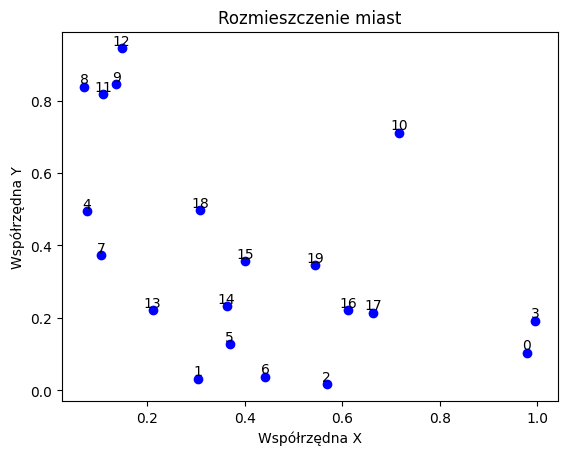

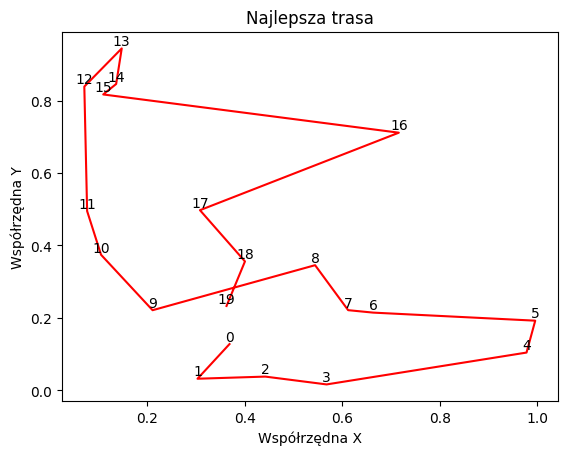

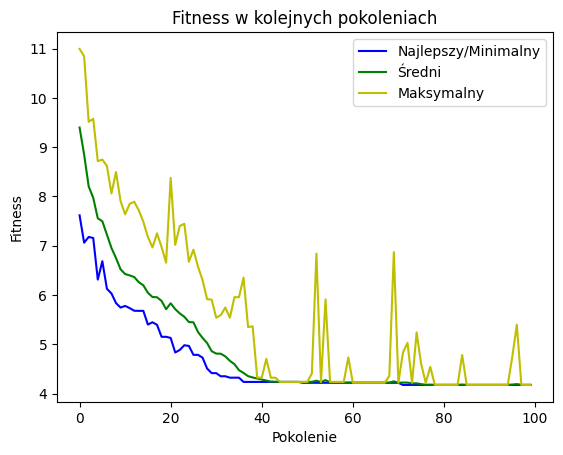

Minimalna/najlepsza wartość fitness: 4.176561382485202
Maksymalna wartość fitness: 10.994583817610659
Średnia wartość fitness: 4.901731325747297

Najlepsza trasa znaleziona przez algorytm ewolucyjny:
[5, 1, 6, 2, 0, 3, 17, 16, 19, 13, 7, 4, 8, 12, 9, 11, 10, 18, 15, 14]
Długość trasy: 4.176561382485202


In [3]:
if __name__ == "__main__":
    main()

# Drugie uruchomienie

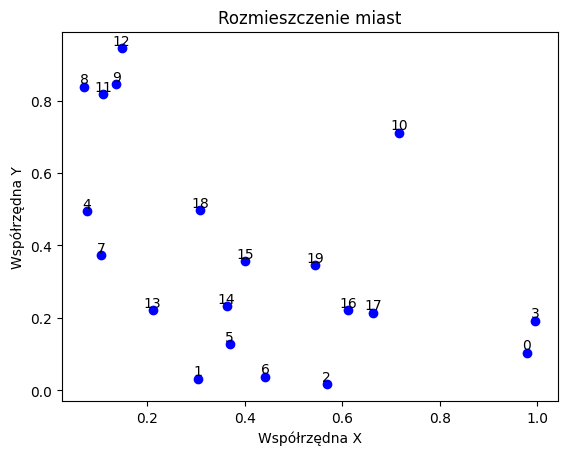

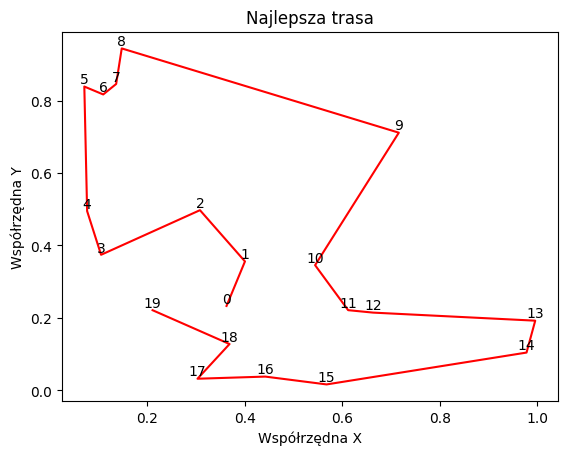

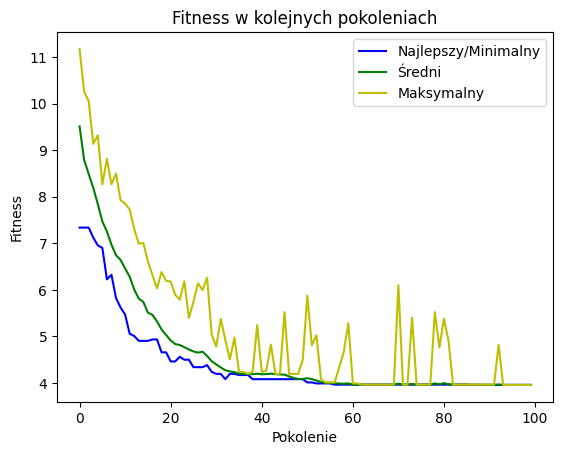

Minimalna/najlepsza wartość fitness: 3.958708718171681
Maksymalna wartość fitness: 11.175893575454246
Średnia wartość fitness: 4.647213480607669

Najlepsza trasa znaleziona przez algorytm ewolucyjny:
[14, 15, 18, 7, 4, 8, 11, 9, 12, 10, 19, 16, 17, 3, 0, 2, 6, 1, 5, 13]
Długość trasy: 3.958708718171681


In [4]:
if __name__ == "__main__":
    main()

# Trzecie uruchomienie

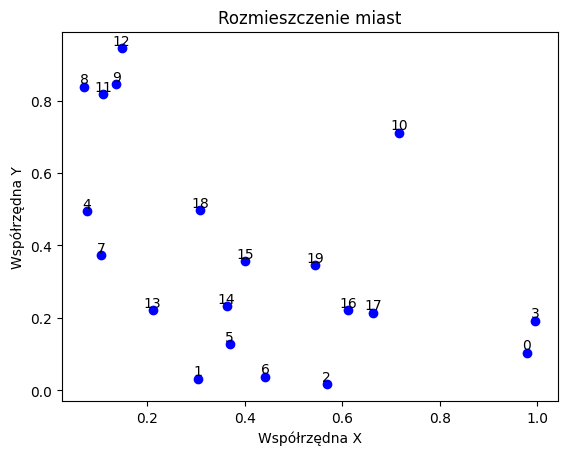

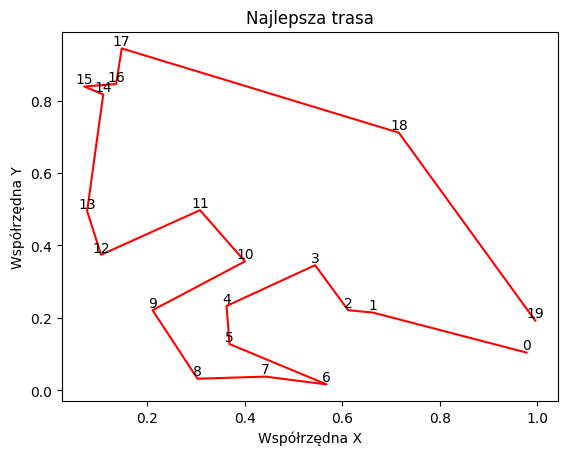

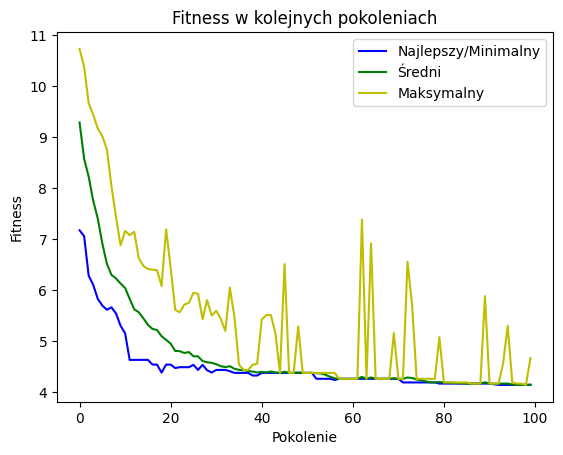

Minimalna/najlepsza wartość fitness: 4.141210745758544
Maksymalna wartość fitness: 10.731896003682158
Średnia wartość fitness: 4.750481271603771

Najlepsza trasa znaleziona przez algorytm ewolucyjny:
[0, 17, 16, 19, 14, 5, 2, 6, 1, 13, 15, 18, 7, 4, 11, 8, 9, 12, 10, 3]
Długość trasy: 4.141210745758544


In [5]:
if __name__ == "__main__":
    main()

# Czwarte uruchomienie

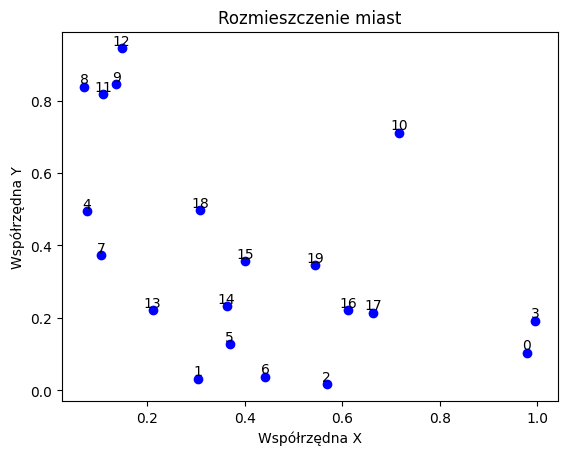

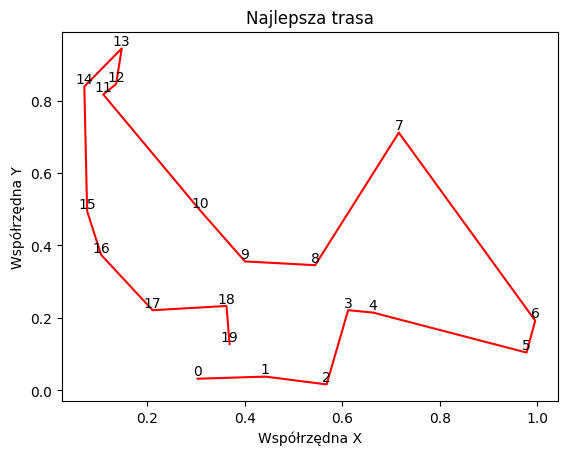

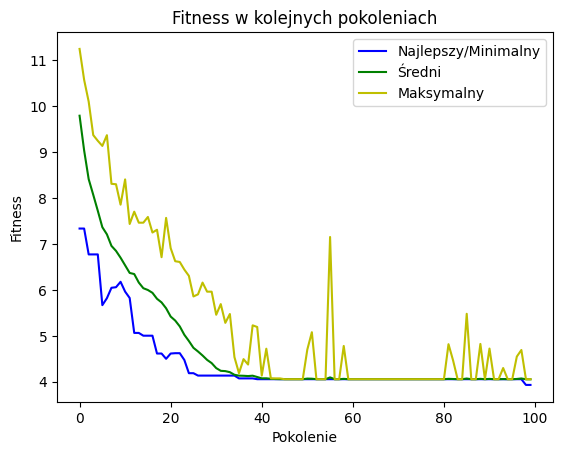

Minimalna/najlepsza wartość fitness: 3.931498441112037
Maksymalna wartość fitness: 11.246728703105989
Średnia wartość fitness: 4.726662680780691

Najlepsza trasa znaleziona przez algorytm ewolucyjny:
[1, 6, 2, 16, 17, 0, 3, 10, 19, 15, 18, 11, 9, 12, 8, 4, 7, 13, 14, 5]
Długość trasy: 3.931498441112037


In [6]:
if __name__ == "__main__":
    main()

# Piąte uruchomienie

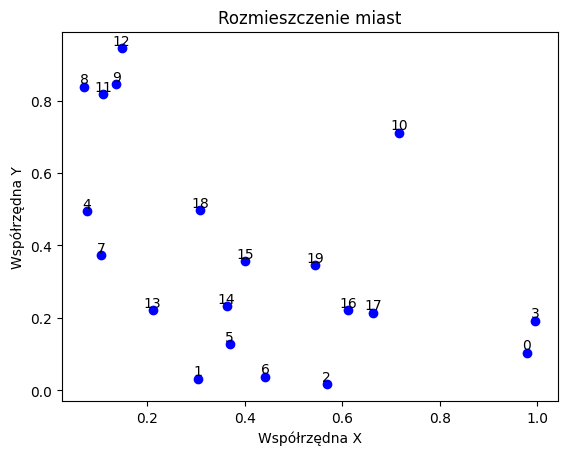

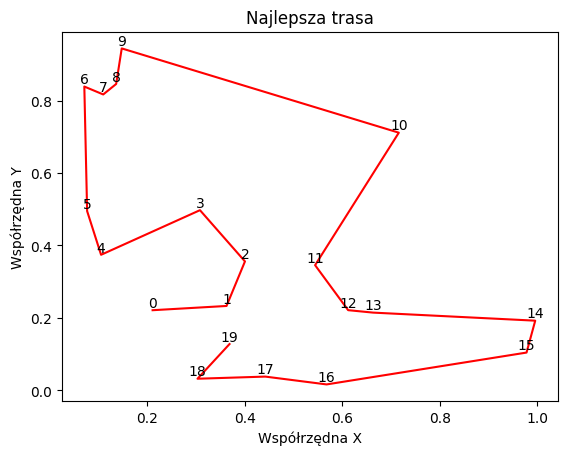

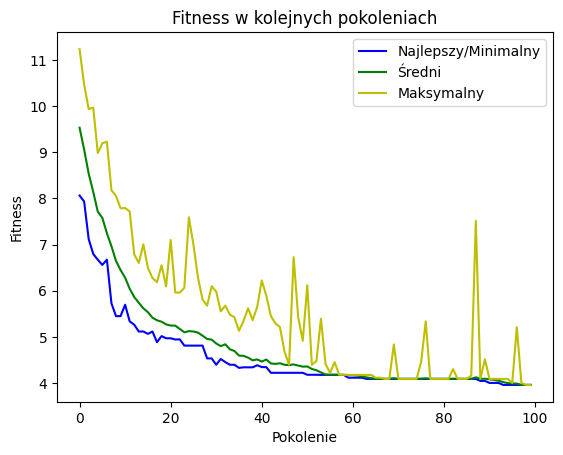

Minimalna/najlepsza wartość fitness: 3.9587087181716805
Maksymalna wartość fitness: 11.240296384211371
Średnia wartość fitness: 4.8148036562329635

Najlepsza trasa znaleziona przez algorytm ewolucyjny:
[13, 14, 15, 18, 7, 4, 8, 11, 9, 12, 10, 19, 16, 17, 3, 0, 2, 6, 1, 5]
Długość trasy: 3.9587087181716805


In [7]:
if __name__ == "__main__":
    main()

# Szóste uruchomienie

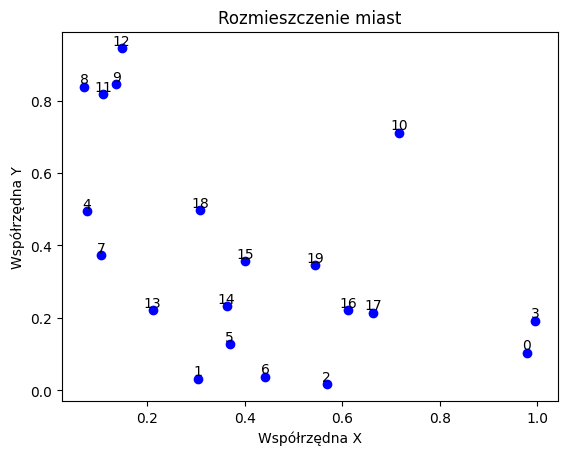

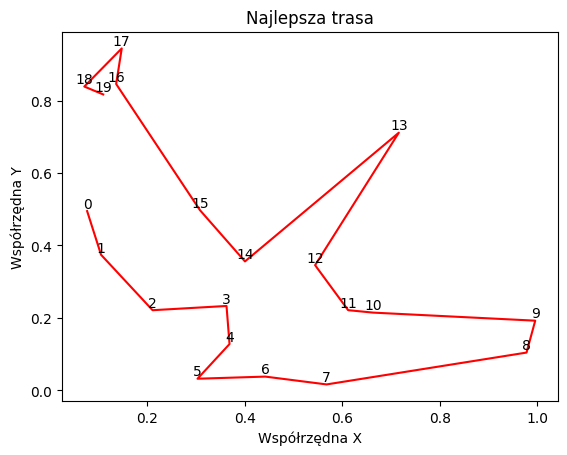

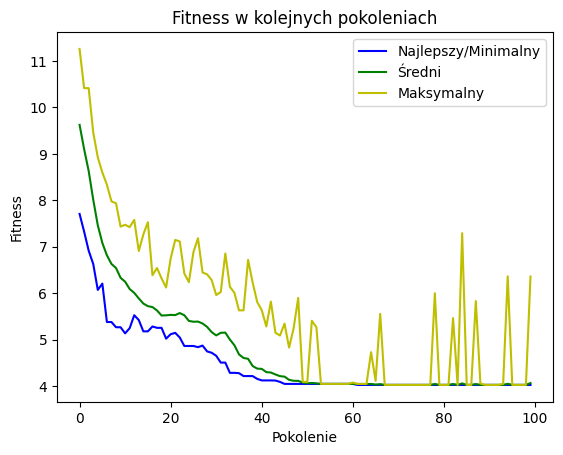

Minimalna/najlepsza wartość fitness: 4.021341633744755
Maksymalna wartość fitness: 11.261754317208792
Średnia wartość fitness: 4.799696706658952

Najlepsza trasa znaleziona przez algorytm ewolucyjny:
[4, 7, 13, 14, 5, 1, 6, 2, 0, 3, 17, 16, 19, 10, 15, 18, 9, 12, 8, 11]
Długość trasy: 4.021341633744755


In [8]:
if __name__ == "__main__":
    main()

# Siódme uruchomienie

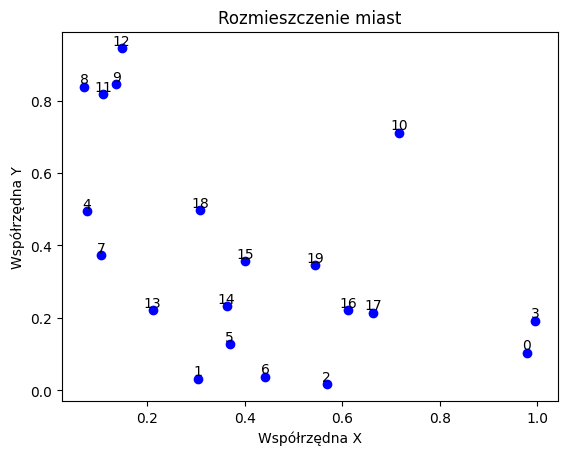

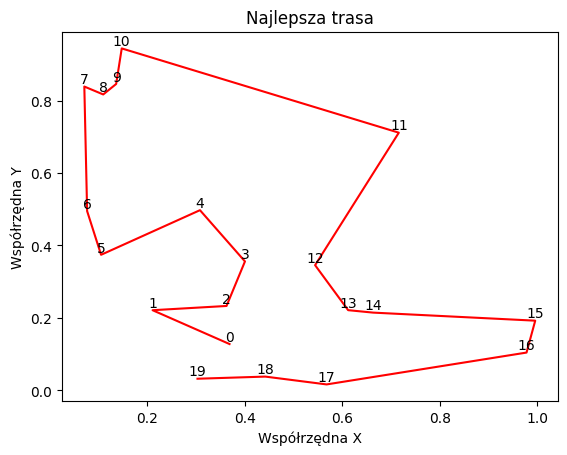

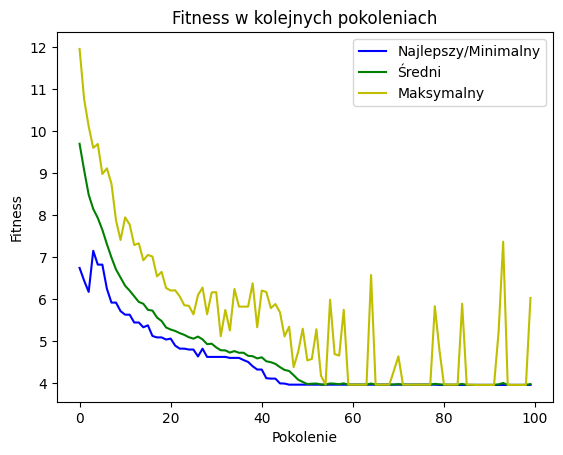

Minimalna/najlepsza wartość fitness: 3.95870871817168
Maksymalna wartość fitness: 11.964491990494295
Średnia wartość fitness: 4.769918975594039

Najlepsza trasa znaleziona przez algorytm ewolucyjny:
[5, 13, 14, 15, 18, 7, 4, 8, 11, 9, 12, 10, 19, 16, 17, 3, 0, 2, 6, 1]
Długość trasy: 3.95870871817168


In [9]:
if __name__ == "__main__":
    main()

# Ósme uruchomienie

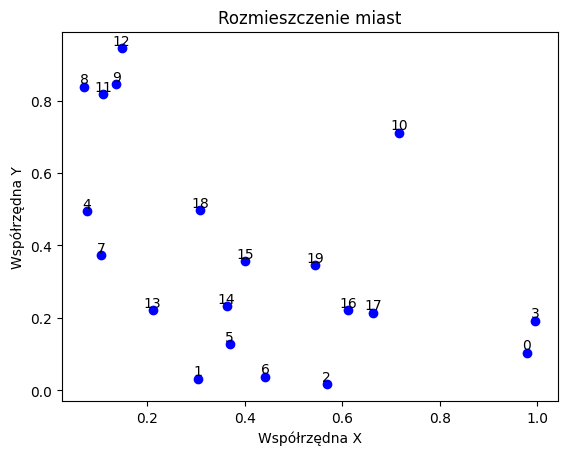

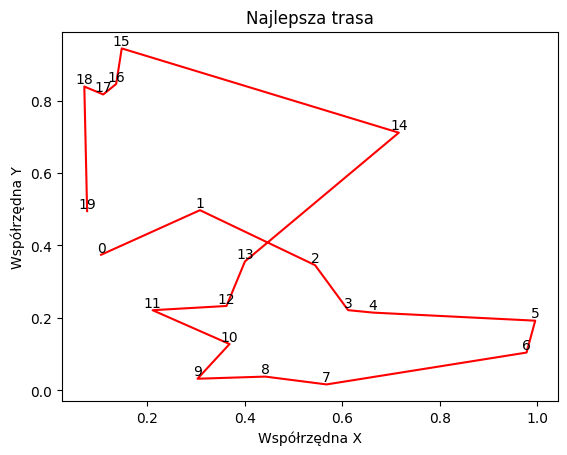

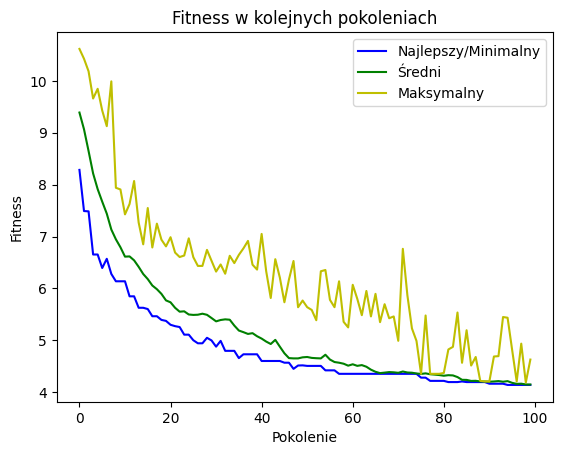

Minimalna/najlepsza wartość fitness: 4.1417715704183315
Maksymalna wartość fitness: 10.615386987752744
Średnia wartość fitness: 5.164654354964031

Najlepsza trasa znaleziona przez algorytm ewolucyjny:
[7, 18, 19, 16, 17, 3, 0, 2, 6, 1, 5, 13, 14, 15, 10, 12, 9, 11, 8, 4]
Długość trasy: 4.1417715704183315


In [10]:
if __name__ == "__main__":
    main()

# Dziewiąte uruchomienie

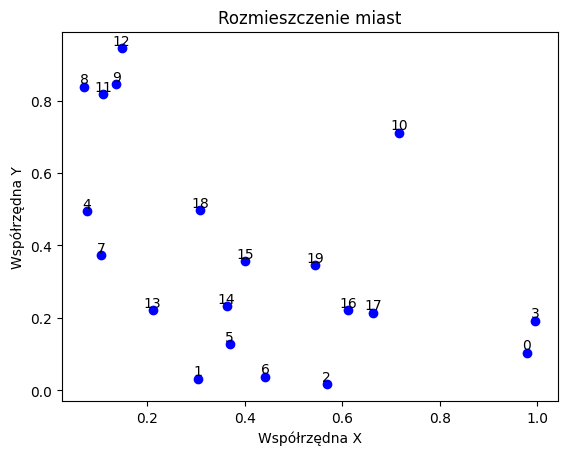

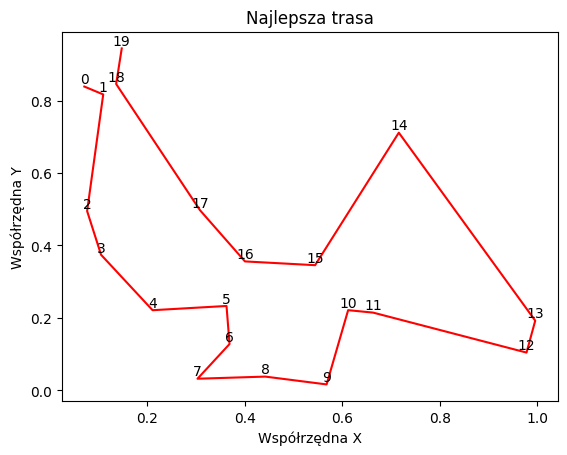

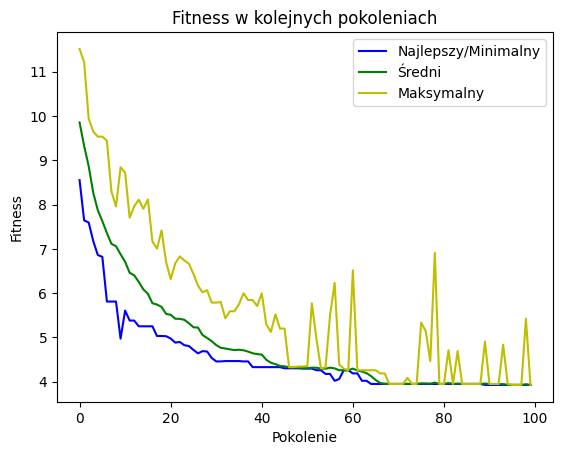

Minimalna/najlepsza wartość fitness: 3.9289839439946532
Maksymalna wartość fitness: 11.511658744272438
Średnia wartość fitness: 4.8683645954017125

Najlepsza trasa znaleziona przez algorytm ewolucyjny:
[8, 11, 4, 7, 13, 14, 5, 1, 6, 2, 16, 17, 0, 3, 10, 19, 15, 18, 9, 12]
Długość trasy: 3.9289839439946532


In [11]:
if __name__ == "__main__":
    main()

# Dziesiąte uruchomienie

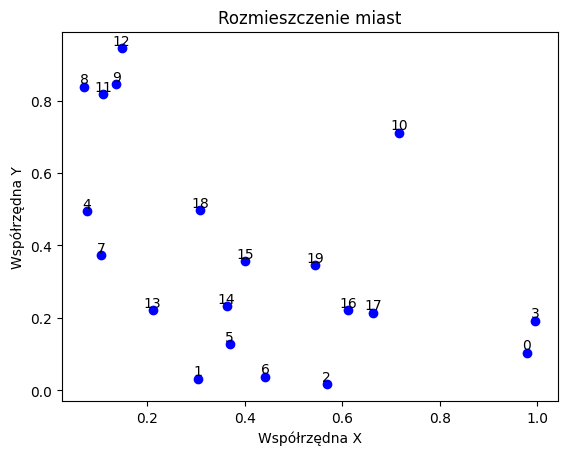

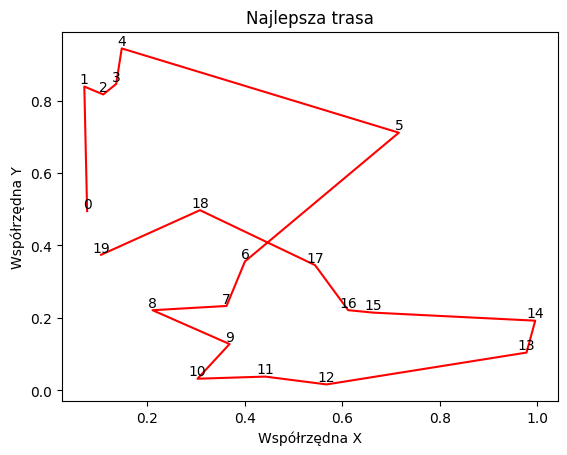

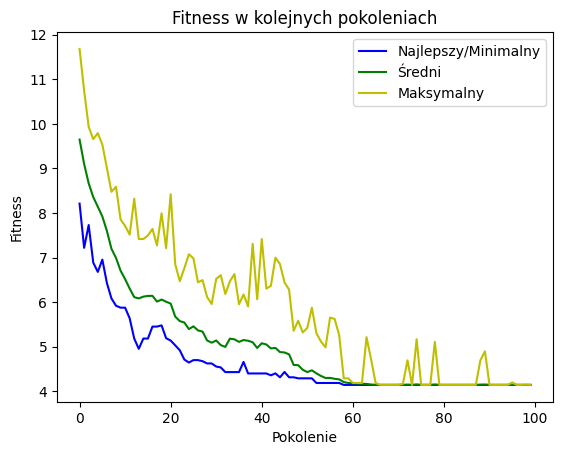

Minimalna/najlepsza wartość fitness: 4.1417715704183315
Maksymalna wartość fitness: 11.681761794677715
Średnia wartość fitness: 5.046449098255485

Najlepsza trasa znaleziona przez algorytm ewolucyjny:
[4, 8, 11, 9, 12, 10, 15, 14, 13, 5, 1, 6, 2, 0, 3, 17, 16, 19, 18, 7]
Długość trasy: 4.1417715704183315


In [12]:
if __name__ == "__main__":
    main()